In [1]:
#importing required Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('Evaluation Project - 9Customer Churn Analysis')

In [2]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
#checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#checking the null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
#here we see ('TotalCharges') is showing as object types so lets handle this
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [6]:
df.loc[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
#from above here we clearly see there are 11 such row where it is blank
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#from above we can clearly see that colum ['TotalCharges'] having 11 null values

In [9]:
# changing the the data type of our ['TotalCharges'] from object to float d types
df['TotalCharges']=df['TotalCharges'].astype(float)

In [10]:
#now we will handle the nan values of our ['TotalCharges']  columns
df['TotalCharges']=df['TotalCharges'].fillna(np.mean(df['TotalCharges']))

In [11]:
#cheking the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#from above we can clearly see that coulmn ['TotalCharges'] is showing as float type

In [12]:
#checkig null values after handling column ['TotalCharges']
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#we can clearly see there is no null values

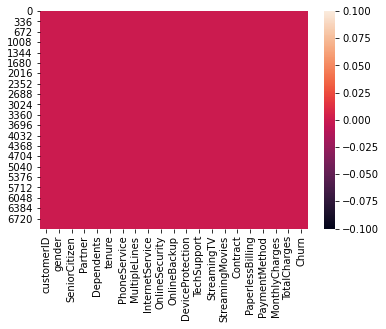

In [13]:
#plotting the heat map
sns.heatmap(df.isnull())

In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
#values counting
for i in df.columns:
    print(df[i].value_counts())

9972-NKTFD    1
2432-TFSMK    1
7989-AWGEH    1
0727-BMPLR    1
0188-GWFLE    1
             ..
3137-NYQQI    1
8012-SOUDQ    1
9057-MSWCO    1
3192-NQECA    1
1262-OPMFY    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes

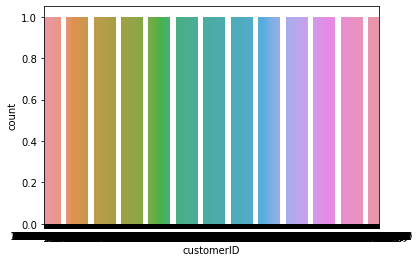

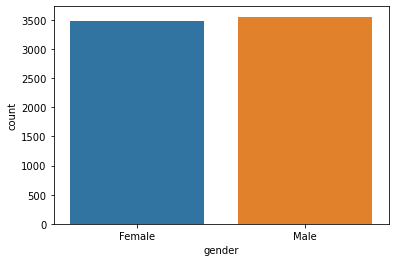

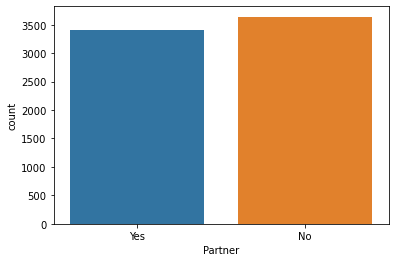

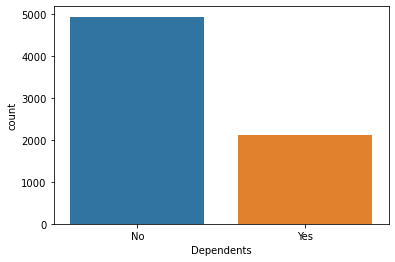

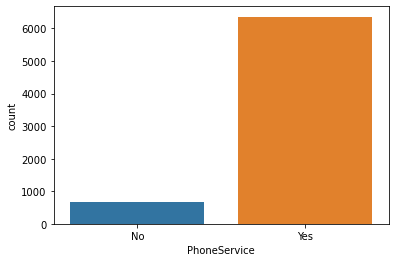

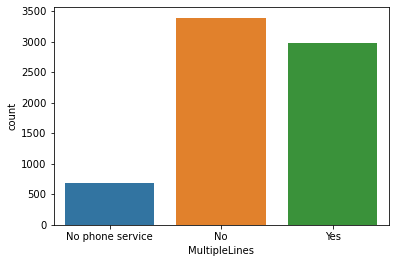

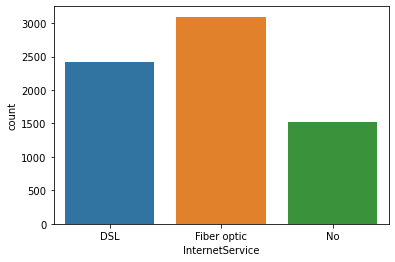

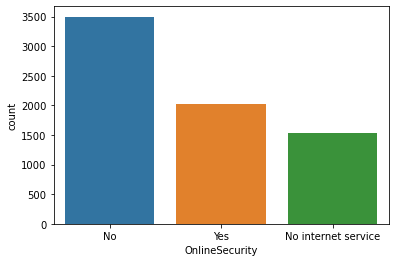

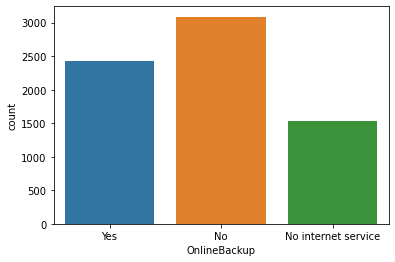

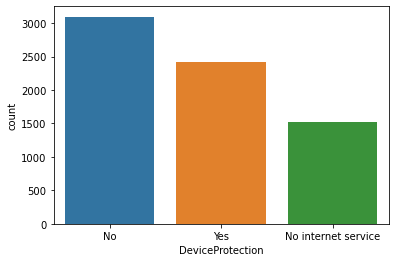

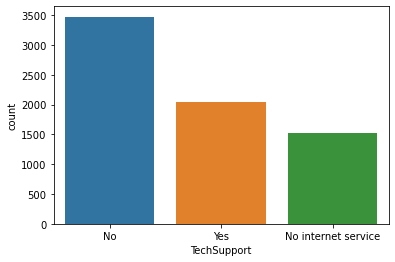

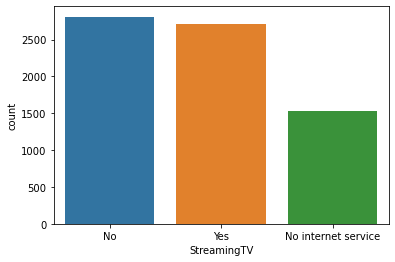

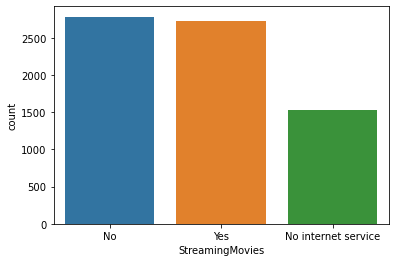

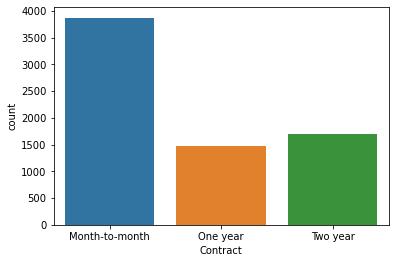

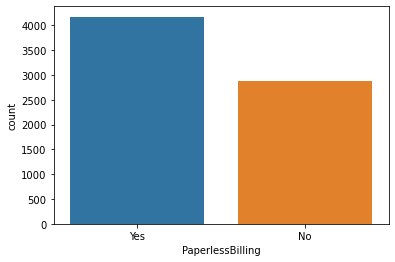

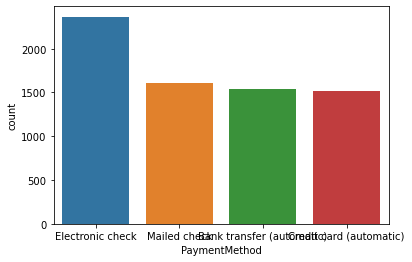

In [16]:
#data Visualization
vcol=['customerID', 'gender', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
for i in vcol:
    plt.figure()
    sns.countplot(i,data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64>


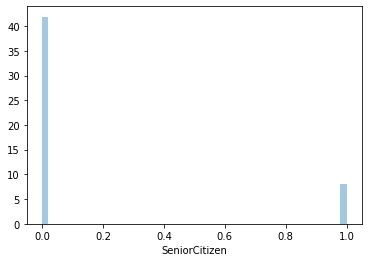

In [17]:
sns.distplot(df['SeniorCitizen'])
print(df['SeniorCitizen'].value_counts)

<bound method IndexOpsMixin.value_counts of 0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64>


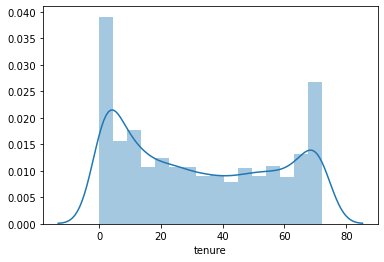

In [18]:
sns.distplot(df[ 'tenure'])
print(df[ 'tenure'].value_counts)

<bound method IndexOpsMixin.value_counts of 0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64>


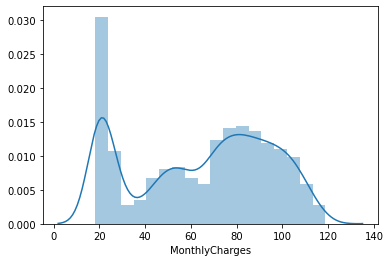

In [19]:
sns.distplot(df['MonthlyCharges'])
print(df['MonthlyCharges'].value_counts)

<bound method IndexOpsMixin.value_counts of 0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64>


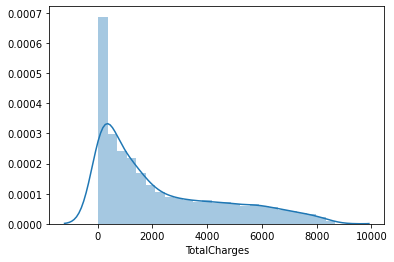

In [20]:
sns.distplot(df['TotalCharges'])
print(df['TotalCharges'].value_counts)

In [21]:
#encoding of from object to numric form
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [22]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [23]:
#now checking the correlations
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000270,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309


In [24]:
#checking the coorelation matrix with respect to our traget variable ['Churn']
corr_matrix=df.corr()
corr_matrix['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199428
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

In [25]:
#checking the statical sumary
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


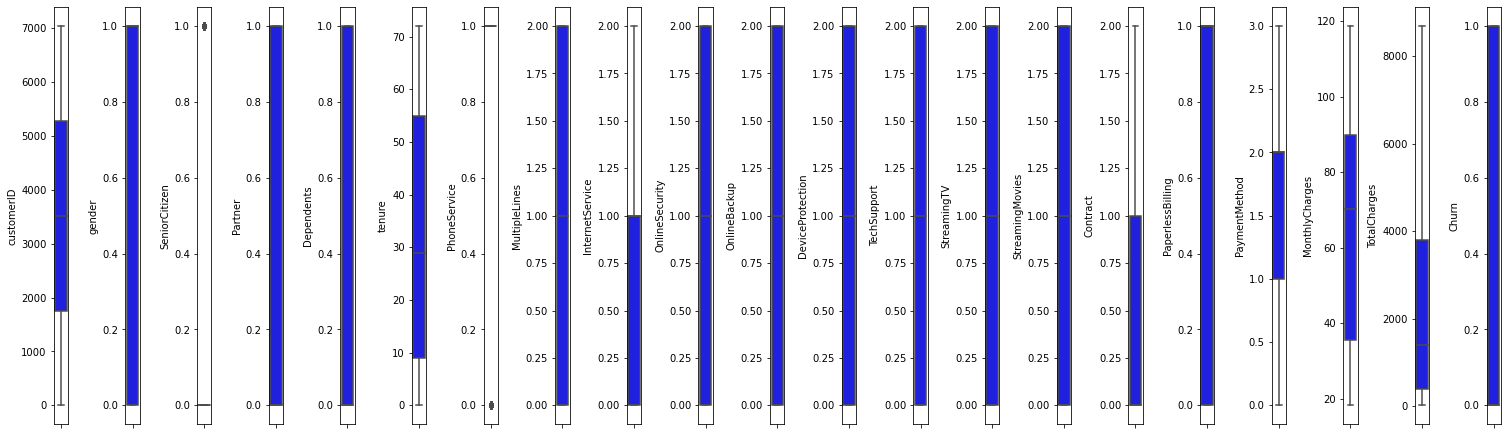

In [26]:
#checking the outlairs
collist=df.columns
ncol=30
nrow=15
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='Blue',orient='v')
    plt.tight_layout()
   

#from above we cab clearly see there are no outlairs presents except {"senioir Citizen",phones service} which is object type.column

In [27]:
#now splitting the feature and traget data
x=df.drop('Churn',axis=1)
x.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65


In [28]:
x.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [29]:
y=df['Churn']
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Churn, dtype: float64

In [30]:
#checking the skewness
x.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
dtype: float64

(array([2709., 1228.,  682.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <a list of 10 Patch objects>)

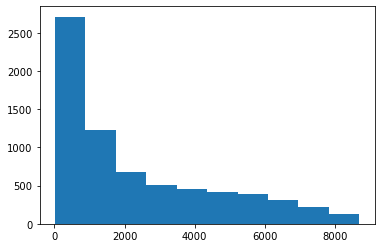

In [31]:
#lets handle the skewness of the  [total cgharges ]
plt.hist(x['TotalCharges'])

In [32]:
from scipy.stats import boxcox

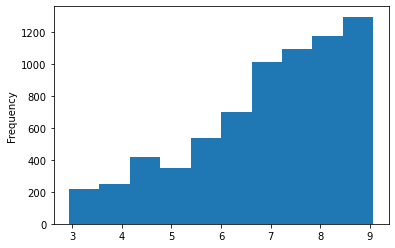

In [33]:
x['TotalCharges']=boxcox(x['TotalCharges'],0)
x['TotalCharges'].plot.hist()

In [34]:
x.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges       -0.755890
dtype: float64

#here we can clry see (x['TotalCharges') lie in range (-0.5 and +0.5)

In [35]:
#scaling the the feature data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x,columns=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'])

In [36]:
x.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.911890,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-2.283661
1,0.216906,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.388723
2,-0.470701,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.454262
3,0.990587,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.371882
4,1.470632,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.236460


In [37]:
x.shape

(7043, 20)

In [38]:
y.shape

(7043,)

In [39]:
y=y.values.reshape(-1,1)

In [40]:
y.shape


(7043, 1)

In [41]:
y

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

In [42]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [43]:
#selecting the best Random state
maxAccu=0
maxRS=0
for i in range (0,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=i)
    Lr.fit(x_train,y_train)
    pred=Lr.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRs=i
print('best accuracy socre is',maxAccu,'on random_state', maxRs)


best accuracy socre is 0.8411347517730496 on random_state 420


In [44]:
#best random state=420
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=420)
    

In [45]:
from sklearn.naive_bayes import GaussianNB 

In [46]:
model=[LogisticRegression(),GaussianNB(),SVC()]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy_score of ',m ,'is',accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('\n')

accuracy_score of  LogisticRegression() is 0.8411347517730496
[[490  35]
 [ 77 103]]
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90       525
         1.0       0.75      0.57      0.65       180

    accuracy                           0.84       705
   macro avg       0.81      0.75      0.77       705
weighted avg       0.83      0.84      0.83       705



accuracy_score of  GaussianNB() is 0.7617021276595745
[[404 121]
 [ 47 133]]
              precision    recall  f1-score   support

         0.0       0.90      0.77      0.83       525
         1.0       0.52      0.74      0.61       180

    accuracy                           0.76       705
   macro avg       0.71      0.75      0.72       705
weighted avg       0.80      0.76      0.77       705



accuracy_score of  SVC() is 0.8283687943262411
[[491  34]
 [ 87  93]]
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       525
 

In [47]:
#cross validation score
from sklearn.model_selection import cross_val_score
for m in model:
    cvr=cross_val_score(m,x,y,cv=5)
    print ("cross validation score of",m,'is',cvr.mean())

cross validation score of LogisticRegression() is 0.8083215046132007
cross validation score of GaussianNB() is 0.7562128000193561
cross validation score of SVC() is 0.7985260137750823


#here we can clearly see the diff between accuracy_score and cv_score is  1 is lowest  in case of GaussianNB()
so Gaussian Nb is  best among above three mentioned models

In [48]:
#ensemble Techniques
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
rf=RandomForestClassifier(n_estimators=50,random_state=0)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Accuracy_score of RandomforestClassifer is :',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy_score of RandomforestClassifer is : 0.825531914893617
[[490  35]
 [ 88  92]]
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       525
         1.0       0.72      0.51      0.60       180

    accuracy                           0.83       705
   macro avg       0.79      0.72      0.74       705
weighted avg       0.82      0.83      0.81       705



In [49]:
#cross validation
cvr=cross_val_score(rf,x,y,cv=5)
print('cross_validation score of the random forest Classifier is',rf,'is',cvr.mean())

cross_validation score of the random forest Classifier is RandomForestClassifier(n_estimators=50, random_state=0) is 0.7961106361700755


In [50]:
#adaboost classifier
ab=AdaBoostClassifier(n_estimators=50)
ab.fit(x_train,y_train)
pred=ab.predict(x_test)
print('Accuracy_score of AdaBoostClassifier is :',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy_score of AdaBoostClassifier is : 0.8453900709219858
[[490  35]
 [ 74 106]]
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90       525
         1.0       0.75      0.59      0.66       180

    accuracy                           0.85       705
   macro avg       0.81      0.76      0.78       705
weighted avg       0.84      0.85      0.84       705



In [51]:
#cross validation
cvr=cross_val_score(ab,x,y,cv=5)
print('cross_validation score of the random forest Classifier is',ab,'is',cvr.mean())#cross validation


cross_validation score of the random forest Classifier is AdaBoostClassifier() is 0.8003683705400348


In [52]:
#saving the best model
import joblib

In [54]:
joblib.dump(GaussianNB(),'Customer Churn Analysis')

['Customer Churn Analysis']